In [7]:
import sys
sys.path.append('..')

In [8]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [9]:
# loading the sameple datasets into DataFrames
data_1 = pd.read_csv("../data/1_space_cluster_samples.csv")
data_3 = pd.read_csv("../data/3_space_cluster_samples.csv")
data_5 = pd.read_csv("../data/5_space_cluster_samples.csv")
data_7 = pd.read_csv("../data/7_space_cluster_samples.csv")

# pulling the data that will be used to train the model out of the datasets and storing them to individual DataFrames
X_1 = data_1[[str(x) for x in range(1, 10)]].values
X_3 = data_3[[str(x) for x in range(1, 10)]].values
X_5 = data_5[[str(x) for x in range(1, 10)]].values
X_7 = data_7[[str(x) for x in range(1, 10)]].values

# putting the training data into a list so we can iteratively test models
X = [X_1, X_3, X_5, X_7]

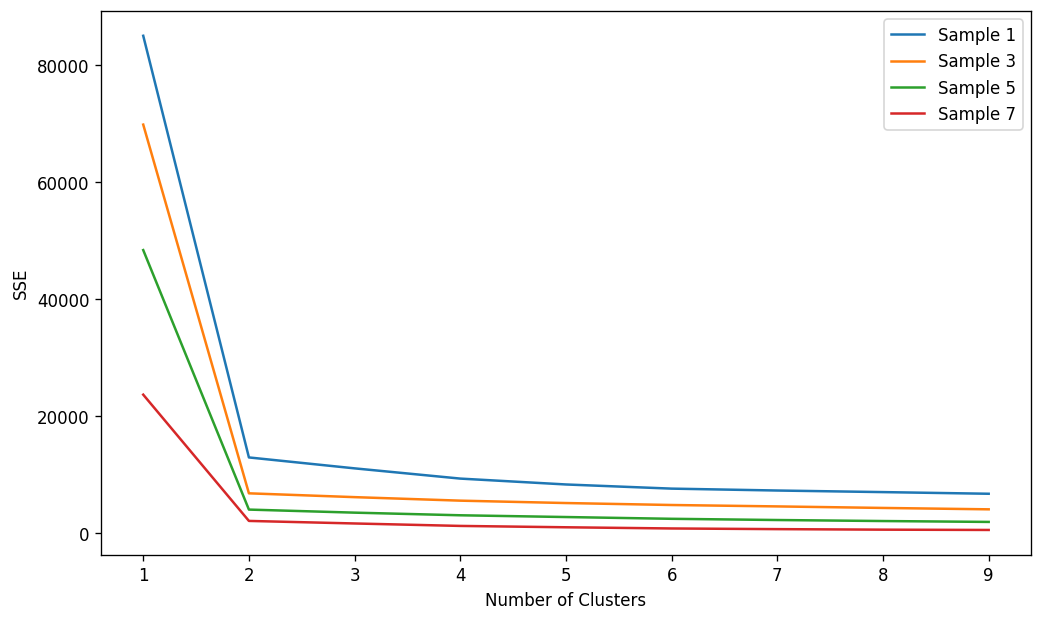

In [10]:
# initializing our plot
plt.figure(figsize=(10, 6), dpi=120)

# iteratively building models to identify an 'elbow' in the chart so that we may more easily identify the appropriate number of clusters
for i, df in enumerate(X):
    sse = dict()
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=2500).fit(df)
        sse[k] = kmeans.inertia_ # sum of squared euclidian distance from each point to its closest centroid
    plt.plot(list(sse.keys()), list(sse.values()), label=f"Sample {(2 * i) + 1}")

plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.legend(loc="upper right")
plt.show()

There is a clearly defined elbow at k=2 clusters in all 4 sample sets.

In [11]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X_5)
kdf = pd.DataFrame(kmeans_model.predict(X_7))
kdf

,0
0,1
1,0
2,0
3,1
4,0
...,...
295,0
296,1
297,0
298,1


In [14]:
# saving the binary of the model so that it can be loaded elsewhere
pickle.dump(kmeans_model, open("../model_binaries/kmeans.sav", "wb"))